# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
import os 
os.chdir(r'C:\Users\karina mehta\UVA class\UnderstandingUncertainity\git_practice\Understanding_Repo\data')

In [5]:
import pandas as pd
import numpy as np

nhanes_meta_data = pd.read_csv('nhanes_meta_17_18.csv',low_memory=False)
nhanes_meta_data.head()

nhanes_data = pd.read_csv('nhanes_data_17_18.csv',low_memory=False)
nhanes_data.columns
categorical_variables = nhanes_data[['GeneralHealthCondition','TriedToQuitSmoking']].copy()

#Missing value calculation
categorical_variables['general_health_na'] = categorical_variables['GeneralHealthCondition'].isna() 
categorical_variables['quit_smoking_na'] = categorical_variables['TriedToQuitSmoking'].isna() 

print('Missing general health data count: ',categorical_variables['general_health_na'].value_counts())
print('Missing quit smoking data count: ',categorical_variables['quit_smoking_na'].value_counts())

categorical_variables_clean = categorical_variables.dropna(subset=['GeneralHealthCondition', 'TriedToQuitSmoking'])


print('Missing general health data count: ',categorical_variables_clean['general_health_na'].value_counts())
print('Missing quit smoking data count: ',categorical_variables_clean['quit_smoking_na'].value_counts())

Missing general health data count:  general_health_na
False    5964
True     2402
Name: count, dtype: int64
Missing quit smoking data count:  quit_smoking_na
True     7380
False     986
Name: count, dtype: int64
Missing general health data count:  general_health_na
False    926
Name: count, dtype: int64
Missing quit smoking data count:  quit_smoking_na
False    926
Name: count, dtype: int64


In [3]:
#Making contingency table
ct = pd.crosstab(categorical_variables_clean['TriedToQuitSmoking'], categorical_variables_clean['GeneralHealthCondition'],normalize='columns')
ct

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
TriedToQuitSmoking,,,,,
0.0,0.388889,0.455197,0.497449,0.488372,0.493671
1.0,0.611111,0.544803,0.502551,0.511628,0.506329


### Observation

#### Missing Values
1. **General Health Condition:** The data is quite messy, with around 2402 missing entries, which makes up approximately 28.7% of the total responses.
2. **Tried to Quit Smoking:** This column is even more incomplete, with 7380 missing entries (about 88% of the dataset), leaving only a small proportion available for analysis.

We drop the nan values and keep only those subsets where both have values present i.e 926 rows

#### Contingency Table Analysis
We can observe that those who tried to quit smoking seem to have a relatively better health condition, with the *“Excellent”* remark being held by about 60% of the people who attempted to quit. Although this shows a pattern, it still feels like a weak relationship since most groups are split close to 50%, with those trying to quit smoking only showing a slightly higher proportion in the *“Very Good”* category. Another reason it appears weak is that people who tried to quit smoking also hold a higher proportion in the *“Poor”* category, which suggests there may not be much correlation in the relationship. 

#### Conclusion
The data is too incomplete and inconsistent to support a strong conclusion. The high percentage of missing values, especially in the Tried to Quit Smoking variable, makes it difficult to rely on the results. Finally, we can conclude that other predictors will be required or cleaner data to give a more fair outlook on the data as well to ensure there is soem sort of correlation or other factors included.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [ ]:
numeric_categorical_variables = nhanes_data[['CurrentSelfreportedWeightPounds','GeneralHealthCondition']]

#Checking missing values for our numeric data
print(numeric_categorical_variables[['CurrentSelfreportedWeightPounds']].isna().value_counts())

numeric_categorical_clean = numeric_categorical_variables.dropna(subset=['GeneralHealthCondition', 'CurrentSelfreportedWeightPounds'])
print(numeric_categorical_clean[['CurrentSelfreportedWeightPounds']].isna().value_counts())


CurrentSelfreportedWeightPounds
False                              5828
True                               2538
Name: count, dtype: int64
CurrentSelfreportedWeightPounds
False                              5417
Name: count, dtype: int64


In [6]:
#Descriptive statistics
numeric_categorical_clean.loc[:,['CurrentSelfreportedWeightPounds', 'GeneralHealthCondition']].groupby('GeneralHealthCondition').describe()

CurrentSelfreportedWeightPounds              \
                                                 count        mean   
GeneralHealthCondition                                               
Excellent                                        500.0  315.410000   
Fair or                                         1134.0  483.822751   
Good                                            2262.0  334.106101   
Poor?                                            169.0  321.798817   
Very good                                       1352.0  238.725592   

                                                                        
                                std   min    25%    50%    75%     max  
GeneralHealthCondition                                                  
Excellent               1204.831420  90.0  135.0  158.0  185.0  9999.0  
Fair or                 1664.206135  86.0  155.0  185.0  225.0  9999.0  
Good                    1202.150398  72.0  148.0  175.0  210.0  9999.0  
Poor?                   1064.212601  95.0  165.0  196.0  240.0  9999.0  
Very good                809.140090  85.0  140.0  165.0  192.0  9999.0

We can notice extreme outliers, with the maximum weight reported as 9999 across all categories. We will filter the data, since we know that 9999 lbs is not possible as weight.

In [10]:
numeric_categorical_clean = numeric_categorical_clean[numeric_categorical_clean['CurrentSelfreportedWeightPounds'] < 2000 ]
numeric_categorical_clean.loc[:,['CurrentSelfreportedWeightPounds', 'GeneralHealthCondition']].groupby('GeneralHealthCondition').describe()

CurrentSelfreportedWeightPounds                         \
                                                 count        mean        std   
GeneralHealthCondition                                                          
Excellent                                        492.0  162.469512  39.620258   
Fair or                                         1100.0  191.737273  53.341340   
Good                                            2226.0  181.793351  48.183931   
Poor?                                            167.0  205.904192  66.251823   
Very good                                       1342.0  169.307750  41.309565   

                                                           
                         min     25%    50%    75%    max  
GeneralHealthCondition                                     
Excellent               90.0  135.00  156.0  185.0  338.0  
Fair or                 86.0  155.00  180.5  220.0  450.0  
Good                    72.0  147.25  175.0  210.0  400.0  
Poor?                   95.0  165.00  195.0  240.0  484.0  
Very good               85.0  140.00  163.5  191.0  400.0

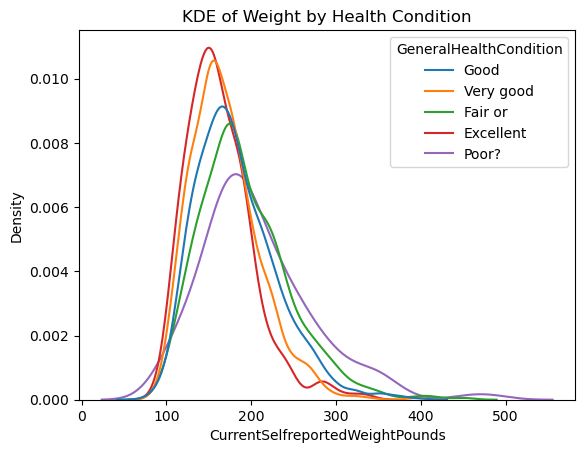

In [12]:
#Descriptive tables 
#Kernel density plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data = numeric_categorical_clean, x =  'CurrentSelfreportedWeightPounds', hue = 'GeneralHealthCondition', common_norm = False).set(title='KDE of Weight by Health Condition')
plt.show()

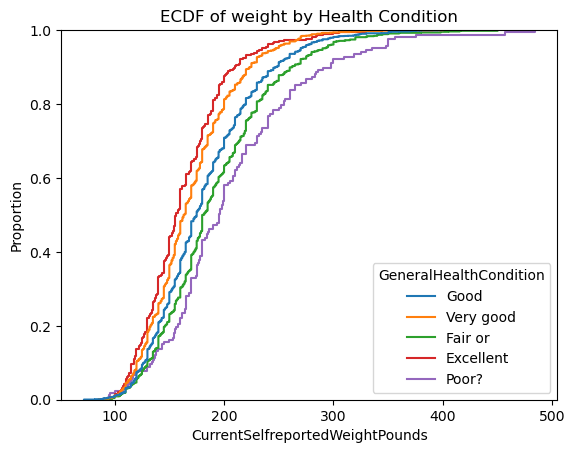

In [13]:
# ECDF Plot
sns.ecdfplot( data= numeric_categorical_clean, x='CurrentSelfreportedWeightPounds', hue='GeneralHealthCondition').set(title='ECDF of weight by Health Condition')
plt.show()

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_25948\1838540046.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diff = numeric_categorical_clean.loc[:,['CurrentSelfreportedWeightPounds', 'GeneralHealthCondition']].groupby('GeneralHealthCondition',sort = False).mean().diff()


<Axes: xlabel='GeneralHealthCondition'>

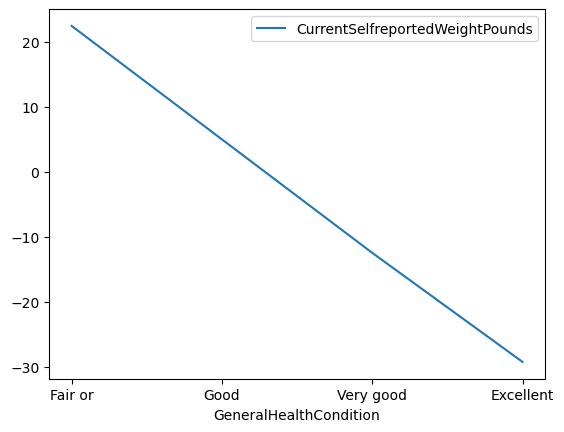

In [16]:
#LinePlot
health_order = ['Poor', 'Fair or', 'Good', 'Very good', 'Excellent']
numeric_categorical_clean['GeneralHealthCondition'] = pd.Categorical(numeric_categorical_clean['GeneralHealthCondition'], ordered = True, categories = health_order)
diff = numeric_categorical_clean.loc[:,['CurrentSelfreportedWeightPounds', 'GeneralHealthCondition']].groupby('GeneralHealthCondition',sort = False).mean().diff()
sns.lineplot(diff)

### Observations
#### Descriptive Table
This data summarizes weight across different general health conditions. On average, individuals reporting *“Poor”* health have the *highest mean weight* and the *widest spread*, while those reporting *“Excellent”* or *“Very good”* health tend to *weigh* less and show *lower variability*. The median values generally align with the means, suggesting symmetric distributions, though maximums indicate some outliers, especially in the *“Poor”* and *“Fair or Good”* groups. Overall, higher reported weight appears associated with worse health.

#### KDE Plot
The density plot shows how common each weight is across the different health conditions. The curves mostly overlap around 150 lbs, with only slight differences between them. The *“Very good”* and *“Excellent”* curves are a bit higher at the main peak, suggesting that slightly more people in these categories cluster around the average weight. There’s also a subtle pattern where those in the better health categories tend to have slightly lower weight than those in the average or poorer categories. Looking at the tails, we can see a few individuals with heavier weights around 200–300 lbs, with the *“Poor?”* curve slightly taller in this range, indicating that higher weight is associated with poorer health. Overall, however, the differences between health categories are small, and most people fall within a similar weight range, so the curves largely overlap

#### ECDF Plot
The ECDF shows a slightly bumpy curve, but there is a steep increase from 100 to 300 lbs, similar to what we observed in the KDE plot. Most individuals are clustered around the average weight, and overall there isn’t a strong relationship between general health condition and weight. All five health categories climb at a similar pace, but we can notice a slight trend where those in the more positive health categories rise a little faster, reflecting slightly lower weights compared to the other categories.

#### LinePlot
The line plot shows how average self-reported weight changes across health categories, from Fair or to Excellent. There’s a clear downward trend, meaning that as people report better health, their weight tends to decrease. For example, the change goes from 20 in Fair or to -30 by the time it reaches Excellent. Overall, it shows that higher weight is generally linked to poorer health.

#### Conclusion
While the differences aren’t huge, there is a subtle trend where higher weights are generally associated with poorer health, and lower weights with better health. The line plot shows the decrease in average weight across health categories, and the descriptive stats highlight that the mean and median weights are lower for the more positive health categories. Together with the KDE and ECDF, this supports the observation that weight slightly decreases as health improves, even though most of the distributions overlap.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

**Our best prediction comes from minimizing the Mean Squared Error, taking weights into account. If we take the derivative and set it to zero, the estimate we get is just the LCLS / Nadaraya-Watson estimator.**

You can view the calculation [here MSE = LCLS](https://docs.google.com/document/d/1eDeYU4NDxoJew1yYf4QH1Xg3uM8sQdFm2r7AsVFchwE/edit?usp=sharing).


4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [29]:
ames_df = pd.read_csv('ames_prices.csv')
ames_df.columns

Index(['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning',
       'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape',
       'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
       'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type',
       'Garage.Yr.B

<Axes: xlabel='Garage.Area', ylabel='price'>

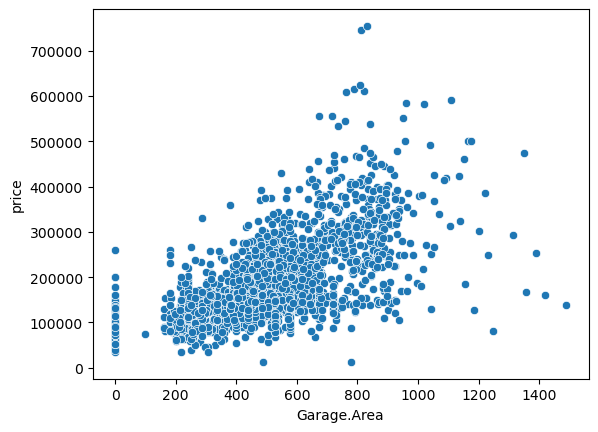

In [36]:
sns.scatterplot(x = 'Garage.Area', y = 'price', data = ames_df)

<Axes: xlabel='Heating', ylabel='price'>

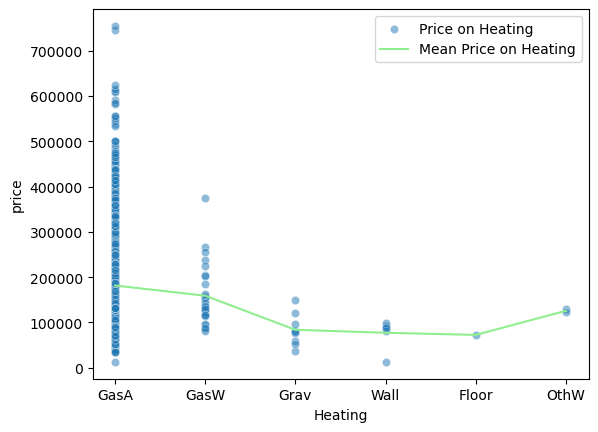

In [43]:
#Conditional expectation of Y i.e. E(Y|X) Expectation of Y (price) given X (area)
means = ames_df.loc[:,['price','Heating']].groupby('Heating').mean()
sns.scatterplot(data = ames_df, y = 'price', x = 'Heating',alpha = 0.5, label = 'Price on Heating')
sns.lineplot(data = means, y = 'price', x = 'Heating', label = 'Mean Price on Heating',color = 'lightgreen')

**Threats to causal identification**
From the scatterplot we can see that most houses with GasA heating have prices clustered between 0–600,000, with a mean around 180,000, while the other heating types such as GasW, Floor, Wall, etc. are associated with much lower average prices. However, this does not imply a causal effect of heating type on price. There are likely many other variables, such as house size, number of bedrooms, location, age of the house, and other amenities that both influence the choice of heating and the final price. Thus, the observed relationship is unlikely to be completely causal.

**Can still use this model to predict**
Heating type can still be used to predict house prices. For example, knowing a house has GasA heating makes it more likely to fall into the higher-price range compared to one with Wall heating. As long as we do not interpret this association as causal, and we avoid interventions like “changing the heating will raise the price” the variable remains useful in predictive modeling.